# Spotify NB 3: 2019


# Variable description

| Variable     | Description | 
| :---        |    :----   |
| acousticness      | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.       |
|album |The album the track was released on.|
|album_track_no| The track no within the album.|
| artists | The artists who performed the track. Each artist object includes a link in href to more detailed information about the artist. |
|artists_id|The Spotify ID for the artist of the track. |
|available_markets| A list of two letter codes that indicate availability in different locations.|
|cover_url |A URL linking to the cover of the album the track was released on.|
| danceability | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| duration_ms | 	The duration of the track in milliseconds. |
| energy |	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| explicit | Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).|
| instrumentalness|Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.  | |
| loudness |The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
| name | 	The name of the track. |
| popularity | The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time. |
|preview_url|A URL linking to a 30 second preview of the track.|
| release_date | The date the album the track is on was released.|
| speechiness | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
| tempo | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.  |
| time_signature | 	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).|
|total_album_tracks|The total number of tracks on the album the track was released on. |
| track_id | The Spotify ID for the track. |
|genres|  A list of the genres the artist is associated with. For example: "Prog Rock" , "Post-Grunge". (If not yet classified, the array is empty.) |

# Set up

In [1]:
%reset -fs

In [2]:
import pandas as pd
import numpy as np
import json

from datetime import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly

import time 
from tqdm import tqdm

from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from ast import literal_eval
from sklearn.neighbors import LocalOutlierFactor

import plotting

%matplotlib inline
plt.style.use('seaborn')
RSEED=np.random.seed(42)

In [3]:
# loading Dataset that was retrieved via API 
#(please refer to the respective notebook for further info)
tracks_2019 = pd.read_csv('data/tracks_2019_genres.csv')

In [4]:
df = tracks_2019.copy()

# dropping the duplicated index
df.drop('Unnamed: 0', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

df.sample(5)

acousticness                                              album  \
655888      0.000369                          Get To Know (The Remixes)   
423848      0.007590               Statement! Recordings - Best of 2019   
642966      0.000845                                         The Kay EP   
657579           NaN  Workout 2020 100 Hits Hard Dance Fitness Burn ...   
49540       0.492000                         Deliric X Silent Strike II   

        album_track_no                 artists              artists_id  \
655888               2  The Groove Technicians  1L7SQk35M4WAO10TXFSZeZ   
423848              10         Various Artists  0LyfQWJT6nXafLPZqxe9Of   
642966               1               Serge Gee  4guV12M4nby67WuowFIqEu   
657579               1          Workout Trance  3dlH8i1pYXu3xe9NFnAR60   
49540                4                 Deliric  357du2352LkLWerYcY49WY   

                                        available_markets  \
655888  ['AD', 'AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE...   
423848  ['AD', 'AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE...   
642966  ['AD', 'AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE...   
657579  ['AD', 'AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE...   
49540   ['AD', 'AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE...   

                                                cover_url  danceability  \
655888  https://i.scdn.co/image/ab67616d0000b273ce8ddd...         0.621   
423848  https://i.scdn.co/image/ab67616d0000b27342b122...         0.505   
642966  https://i.scdn.co/image/ab67616d0000b27333cb38...         0.741   
657579  https://i.scdn.co/image/ab67616d0000b273aad376...           NaN   
49540   https://i.scdn.co/image/ab67616d0000b2735621ea...         0.598   

        duration_ms  energy  ...  \
655888       516774   0.953  ...   
423848       231304   0.994  ...   
642966       371633   0.666  ...   
657579      7131106     NaN  ...   
49540        166000   0.423  ...   

                                                     name  popularity  \
655888                        Get To Know - 2Cubans Remix           0   
423848                   Games - Giuseppe Ottaviani Remix           9   
642966                                                 1K           0   
657579  Workout 2020 100 Hits Hard Dance Fitness Burn ...           0   
49540                                                 Azi          41   

                                              preview_url  release_date  \
655888  https://p.scdn.co/mp3-preview/c101c6d091f4be9b...    2019-01-02   
423848  https://p.scdn.co/mp3-preview/cc48303eac2714f1...    2019-12-20   
642966  https://p.scdn.co/mp3-preview/128d51074f4cf63d...    2019-03-14   
657579  https://p.scdn.co/mp3-preview/e9cbc17b4d3358cd...    2019-11-21   
49540   https://p.scdn.co/mp3-preview/b4e41ca29b812292...    2019-09-27   

       speechiness    tempo time_signature total_album_tracks  \
655888      0.0567  124.003            4.0                  4   
423848      0.0419  138.008            4.0                 10   
642966      0.0802  123.011            4.0                  3   
657579         NaN      NaN            NaN                101   
49540       0.6080  120.234            4.0                 16   

                      track_id                                 genres  
655888  15YmMB5hvlOigPKZzs7kLZ                                     []  
423848  48p429gj5NHViUwJaFYPZc                                     []  
642966  48IC2yAypgnXsOUGDzmH1k                                     []  
657579  0l0MjxySQ4jcL6ZXRURaI7                    ['workout product']  
49540   30mWjbK3HiLd8N4IHBCmzE  ['romanian hip hop', 'romanian trap']  

[5 rows x 24 columns]

# Data types & missings

## Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779931 entries, 0 to 779930
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   acousticness        779736 non-null  float64
 1   album               779928 non-null  object 
 2   album_track_no      779931 non-null  int64  
 3   artists             779926 non-null  object 
 4   artists_id          779931 non-null  object 
 5   available_markets   779931 non-null  object 
 6   cover_url           779931 non-null  object 
 7   danceability        779736 non-null  float64
 8   duration_ms         779931 non-null  int64  
 9   energy              779736 non-null  float64
 10  explicit            779931 non-null  bool   
 11  instrumentalness    779736 non-null  float64
 12  liveness            779736 non-null  float64
 13  loudness            779736 non-null  float64
 14  name                779931 non-null  object 
 15  popularity          779931 non-nul

## Missings

In [6]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing=missing[missing.Number!=0]
missing

Number  Percentage
acousticness         195         0.0
album                  3         0.0
artists                5         0.0
danceability         195         0.0
energy               195         0.0
instrumentalness     195         0.0
liveness             195         0.0
loudness             195         0.0
preview_url        24742         3.2
speechiness          195         0.0
tempo                195         0.0
time_signature       195         0.0
genres               132         0.0

In general the dataset is not missing substantial parts. Instances that show missing values that make up less than 0.0% of the dataset will be removed.
As the preview_url will not be used for analysis purposes, these missing values will not become an issue and therefore can be kept as is. 

In [7]:
# dropping nas for all columns except preview_url
df.dropna(subset=list(missing.index.drop('preview_url')), inplace=True)

In [8]:
# getting some basic statistics
df.describe().round(2)

acousticness  album_track_no  danceability  duration_ms     energy  \
count     779596.00       779596.00     779596.00    779596.00  779596.00   
mean           0.40           37.08          0.61    202587.70       0.50   
std            0.33          106.34          0.19    152080.48       0.27   
min            0.00            1.00          0.00      1071.00       0.00   
25%            0.07            2.00          0.52    129800.00       0.27   
50%            0.35            6.00          0.66    183899.00       0.49   
75%            0.69           22.00          0.73    237457.25       0.72   
max            1.00         3037.00          0.99   6074944.00       1.00   

       instrumentalness   liveness   loudness  popularity  speechiness  \
count         779596.00  779596.00  779596.00   779596.00    779596.00   
mean               0.23       0.21     -12.61        9.72         0.31   
std                0.37       0.17       7.23       14.19         0.36   
min                0.00       0.00     -60.00        0.00         0.00   
25%                0.00       0.10     -16.90        0.00         0.05   
50%                0.00       0.14     -10.94        2.00         0.09   
75%                0.52       0.28      -7.14       15.00         0.49   
max                1.00       1.00       5.80       95.00         0.97   

           tempo  time_signature  total_album_tracks  
count  779596.00       779596.00           779596.00  
mean      116.85            3.78               87.22  
std        31.84            0.77              228.64  
min         0.00            0.00                1.00  
25%        92.42            4.00                5.00  
50%       119.16            4.00               14.00  
75%       136.14            4.00               50.00  
max       249.95            5.00             3385.00

## Artists

/Users/vivika/nf-may-20/Capstone/Spotify_private/plotting.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 576x396 with 0 Axes>

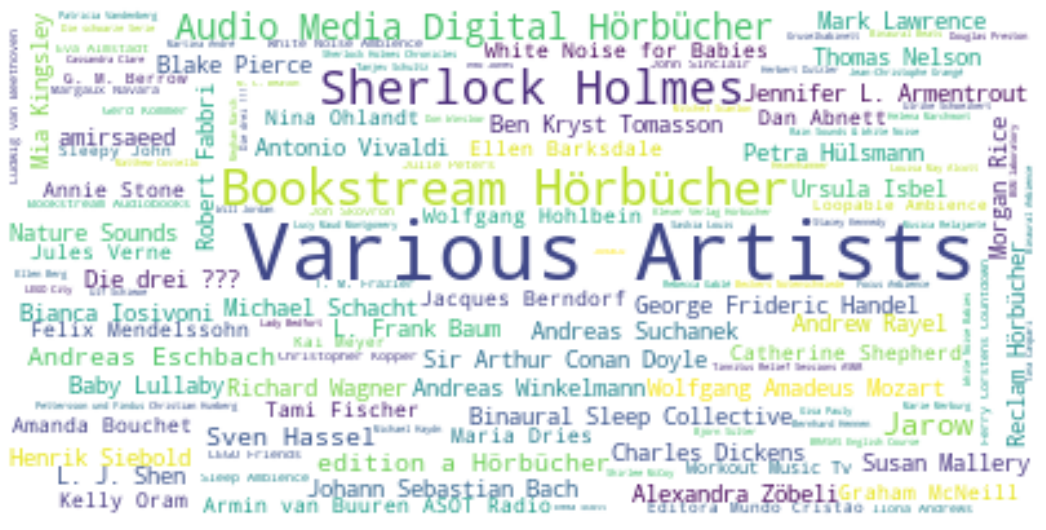

In [9]:
sns.set(style="whitegrid", palette="viridis", color_codes=True)
plt.tight_layout()
plotting.wc(df[['artists']])

### Tracks per artists (in dataset)

In [10]:
# fraction of artists in comparison to the entire dataset
round(df['artists'].nunique()/df['track_id'].nunique(),2)

0.3

In [11]:
artists_counts = pd.DataFrame(df['artists'].value_counts())
artists_counts=artists_counts.rename(columns={"artists": "count"})
artists_counts.head(10)

count
Various Artists                48513
Bookstream Hörbücher            9585
Sherlock Holmes                 8469
Audio Media Digital Hörbücher   5167
Jarow                           3439
Sven Hassel                     2216
edition a Hörbücher             2078
Andreas Eschbach                2012
Susan Mallery                   1762
Michael Schacht                 1634

In [12]:
# checking how many artists in the dataset are represented by more than 3 tracks
a=list(artists_counts[artists_counts['count']>3].index)[1:]
len(a)

29158

Because of the way the data was retrieved, some artists are presented by a large amount of tracks, causing a bias in the Dataset. Therefore, the maximum for tracks from each artist for this analysis will be set to 3.

In [13]:
c=[]
for b in tqdm(a):
    c+=list(df[df['artists']==b].index)[3:]
df.drop(c, axis=0, inplace=True)
df_copy1=df.copy()
df.shape 

100%|██████████| 29158/29158 [16:22<00:00, 29.67it/s]


(408941, 24)

In [14]:
# safety copy as a starting point
df=df_copy1.copy()
df.reset_index(drop=True, inplace=True)

## Album tracks

In [15]:
# fraction of albums in comparison to the entire dataset
round(df['album'].nunique()/df['track_id'].nunique(),2)

0.66

In [16]:
album_counts = pd.DataFrame(df['album'].value_counts())
album_counts=album_counts.rename(columns={"album": "count"})
album_counts.head(10)

count
Götzendämmerung - Perry Rhodan - Silber Edition...    530
Ego                                                   147
Lo Más Escuchado De                                   138
Oasis                                                 128
MVP                                                   116
Accordion Fingering                                   115
Ghost                                                  95
Ugly                                                   91
Okay                                                   89
VVS                                                    89

In [17]:
# checking how many artists in the dataset are represented by more than 3 tracks
a=list(album_counts[album_counts['count']>3].index)
len(a)

8638

Because of the way the data was retrieved, some albums are presented by a large amount of tracks, causing a bias in the Dataset. Therefore, the maximum for tracks from each album for this analysis will be set to 3.

In [18]:
c=[]
for b in tqdm(a):
    c+=list(df[df['artists']==b].index)[3:]
df.drop(c, axis=0, inplace=True)
df_copy2=df.copy()
df.shape 

100%|██████████| 8638/8638 [02:30<00:00, 57.25it/s]


(360431, 24)

In [19]:
# safety copy as a starting point
df=df_copy2.copy()
df.reset_index(drop=True, inplace=True)

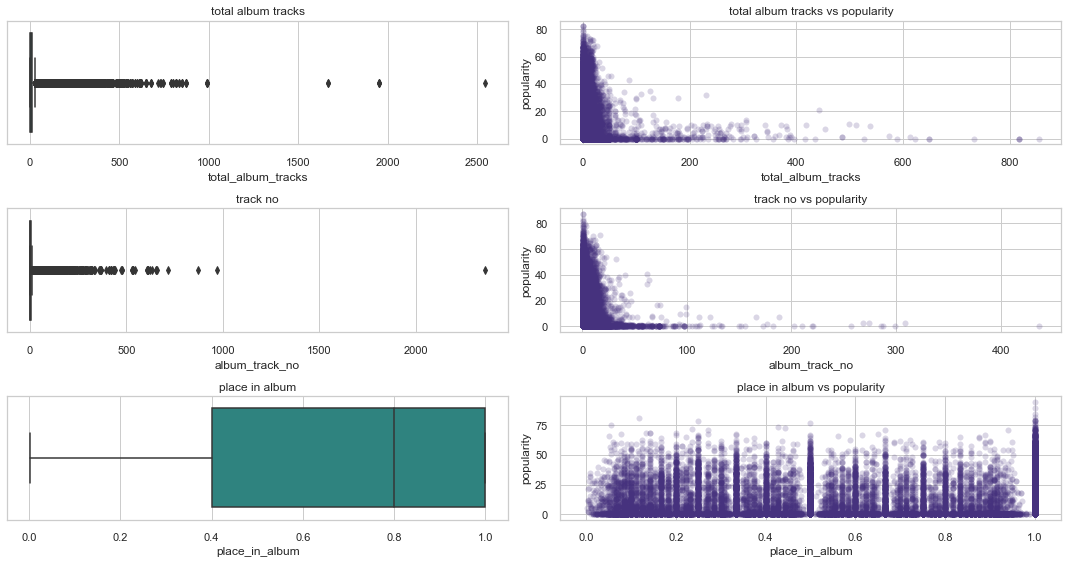

In [20]:
f, axes = plt.subplots(3, 2, figsize=(15, 8), sharex=False)

# Album Tracks
sns.boxplot(df['total_album_tracks'], palette='viridis',ax=axes[0,0]).set_title('total album tracks')
sns.scatterplot(x="total_album_tracks", y="popularity", data=df.sample(frac=0.1, random_state=RSEED),
                palette="viridis", sizes=(1, 8), linewidth=0, ax=axes[0,1], alpha=0.2).set_title('total album tracks vs popularity');

# Track No
sns.boxplot(df['album_track_no'], palette='viridis', ax=axes[1,0]).set_title('track no');
sns.scatterplot(x="album_track_no", y="popularity", data=df.sample(frac=0.1, random_state=RSEED),
                palette="viridis", sizes=(1, 8), linewidth=0, ax=axes[1,1], alpha=0.2).set_title('track no vs popularity');

# Ratio
df['place_in_album']=df['album_track_no']/df['total_album_tracks']
sns.boxplot(df['place_in_album'], palette='viridis',ax=axes[2,0]).set_title('place in album');
sns.scatterplot(x="place_in_album", y="popularity", data=df.sample(frac=0.1, random_state=RSEED),
                palette="viridis",sizes=(1, 8), linewidth=0, ax=axes[2,1], alpha=0.2).set_title('place in album vs popularity');

f.tight_layout()
plt.savefig('figures/album_tracks_2019.png')

In [21]:
df[['total_album_tracks','album_track_no']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360431 entries, 0 to 360430
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   total_album_tracks  360431 non-null  int64
 1   album_track_no      360431 non-null  int64
dtypes: int64(2)
memory usage: 5.5 MB


## Popularity

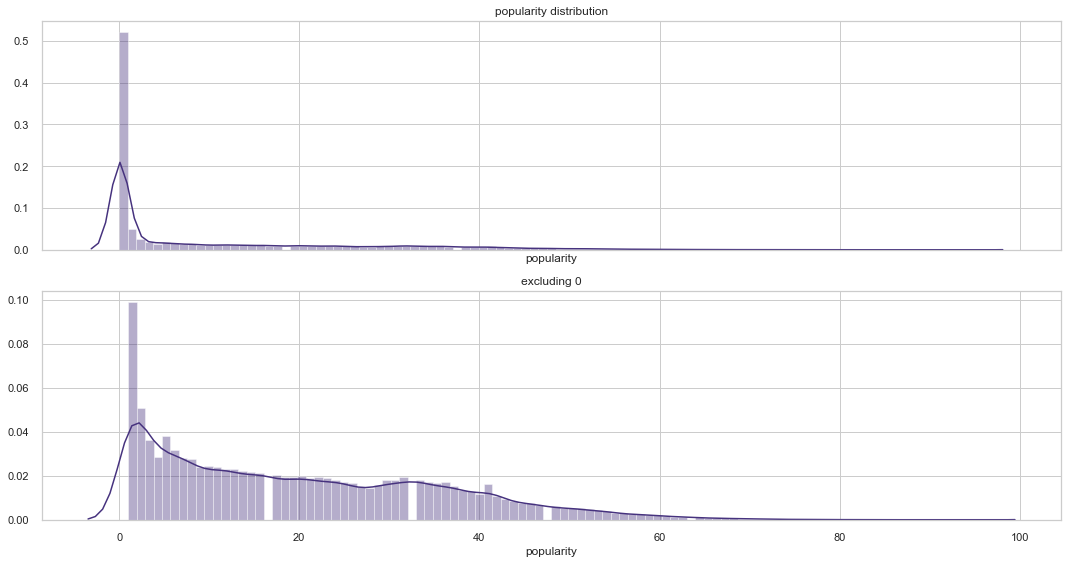

In [21]:
# plotting popularity distribution including and excluding 0
f, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
sns.distplot(df['popularity'], bins=100, ax=axes[0]).set_title('popularity distribution')
sns.distplot(df[df['popularity']>0]['popularity'],bins=100, ax=axes[1]).set_title('excluding 0');#f.tight_layout()

f.tight_layout()
plt.savefig('figures/pop_2019_dist.png')

In [22]:
df['popularity'].describe().round()

count    360431.0
mean         10.0
std          15.0
min           0.0
25%           0.0
50%           1.0
75%          17.0
max          95.0
Name: popularity, dtype: float64

In [23]:
round((df[df['popularity']>0].shape[0]/df.shape[0])*100,2)

50.43

The popularity distribution is extremely skewed to the left, with around half of the tracks showing a popularity of 0. While it is far from normal, this distribution seems logical as only very few songs become a hit and a lot of the releases stay unnoticed.

## Availability

In [24]:
# splitting markets into seperate dataframe
markets = df['available_markets'].str.strip("[]")
markets = markets.str.split("',", expand=True)

In [25]:
# counting occurances columnwise
dicts=[]
for col in markets:
    try:
        markets[col]=markets[col].str.replace("'","")
        markets[col]=markets[col].str.replace(" ","")

    except:
        pass
    dicts.append(markets[col].value_counts().to_dict())

# adding counts per column
c = Counter()
for d in dicts:
    c.update(d)

In [26]:
# creating dataframe
c = pd.DataFrame.from_dict(c, orient='index').reset_index()
c = c.rename(columns={"index": "market", 0: 'count'})
c['percent_of_total'] = ((c['count'] / markets.shape[0]) * 100).round()
c

market   count  percent_of_total
0      AD  358069              99.0
1      AT  360314             100.0
2      AE  357372              99.0
3      AL  358100              99.0
4      AR  357457              99.0
5      DE  360407             100.0
6              24               0.0
7      BE  358327              99.0
8      AU  356552              99.0
9      NZ  356693              99.0
10     CA  356136              99.0
11     CH  360143             100.0
12     CY  358202              99.0
13     CO  357486              99.0
14     BA  358269              99.0
15     BR  357021              99.0
16     CZ  358395              99.0
17     GB  358309              99.0
18     BO  357552              99.0
19     BY  332878              92.0
20     BG  358279              99.0
21     GR  358321              99.0
22     SE  358158              99.0
23     CR  357396              99.0
24     ES  358405              99.0
25     EG  357442              99.0
26     FR  358117              99.0
27     DK  358196              99.0
28     JP  353029              98.0
29     CL  357281              99.0
..    ...     ...               ...
63     SG  357358              99.0
64     MK  358295              99.0
65     GT  357394              99.0
66     MA  357547              99.0
67     EC  357468              99.0
68     RO  358316              99.0
69     LT  358264              99.0
70     TW  357341              99.0
71     UA  357844              99.0
72     MC  358100              99.0
73     MX  356584              99.0
74     PA  357455              99.0
75     LV  358237              99.0
76     TN  357544              99.0
77     TH  357406              99.0
78     PE  357468              99.0
79     PY  357474              99.0
80     VN  357354              99.0
81     SV  357451              99.0
82     SA  357368              99.0
83     HN  357387              99.0
84     ZA  357649              99.0
85     JO  357546              99.0
86     OM  357350              99.0
87     KW  357349              99.0
88     NI  357396              99.0
89     UY  357523              99.0
90     LB  357538              99.0
91     PS  353027              98.0
92     QA  357478              99.0

[93 rows x 3 columns]

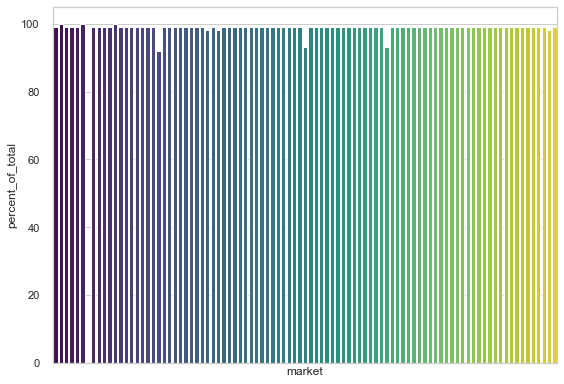

In [27]:
# plotting
chart=sns.barplot(x=c['market'],y=c['percent_of_total'],palette='viridis');

# removing x axis lable
for label in chart.xaxis.get_ticklabels():
    label.set_visible(False)

plt.tight_layout()
plt.savefig('figures/market_2019_count.png')

As can be seen from the graph, almost all markets show close to 100% availability of the tracks. There are 24 occurrences of missing data as the value for markets is '[]'. Due to a lack of variability, this variable will not prove very useful in any further analysis.

## Release month

In [28]:
# extreacting months from release date
df['month'] = [int(x.split("-")[1]) if len(x.split("-"))> 1 else None for x in df['release_date']]

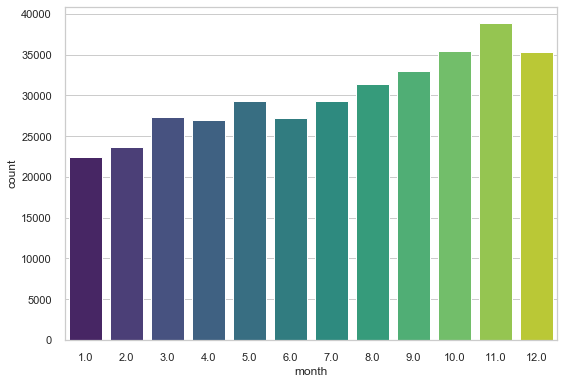

In [29]:
# plotting
sns.countplot(df['month'],palette='viridis');
plt.tight_layout()
plt.savefig('figures/month_2019_count.png')

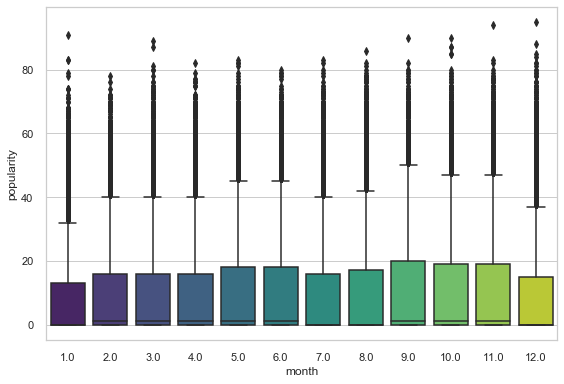

In [30]:
# plotting popularity distribution month-wise
sns.boxplot(x="month", y="popularity", data=df, palette='viridis')
plt.tight_layout()
plt.savefig('figures/month_2019_box.png')

While there are slightly more new releases towards the end of 2019, popularity is distributed similarly in the different release months.  

## Characteristics

In [31]:
# defining characteristics
chars = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']

In [32]:
# creating auxhilary dataframe
char_df=pd.DataFrame(columns=['popularity', 'characteristic', 'value'])
for c in chars:
    temp = df[['popularity', c]]
    temp['characteristic']= c
    temp.columns=['popularity', 'value', 'characteristic']
    char_df= char_df.append(temp)
char_df.reset_index(drop=True, inplace=True)

#Due to the way the data is distributed we assume the top 20% of the tracks can be considered popular.
threshold=df['popularity'].quantile(0.8)
char_df['popular'] = 'no'
char_df.loc[char_df['popularity'] >= threshold, 'popular'] = 'yes' 
char_df['popular'].value_counts()


/Users/vivika/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/vivika/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




no     1728936
yes     433650
Name: popular, dtype: int64

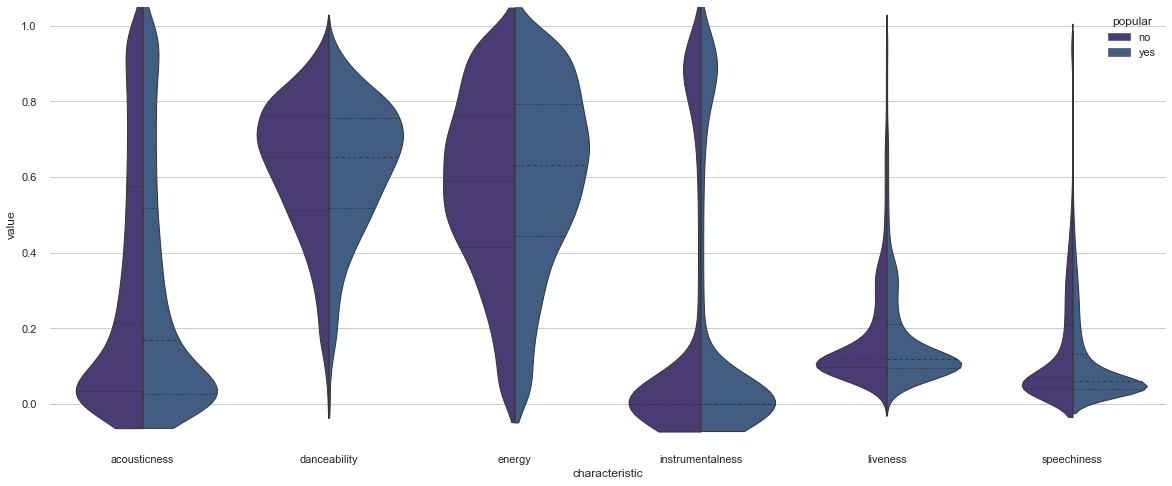

In [33]:
sns.set(style="whitegrid", palette="viridis", color_codes=True)

# plotting
f, ax = plt.subplots(figsize=(20, 8))
sns.violinplot(
    x='characteristic',
    y='value',
    data=char_df,
    bw=.2,
    cut=1,
    linewidth=1,
    hue='popular',
    split=True,
    inner="quart",
)
ax.set(ylim=(-0.1, 1.05))
sns.despine(left=True, bottom=True)
plt.savefig('figures/char_2019_violin.png')

As can been seen from the plot, distributions of the different audio feature only differ marginally between popular and unpopular tracks. There is however a clear tendency for tracks to me low on instrumentalness, liveness and speechiness and high on danceability. Acousticness and energy are more evenly distributed, however still skewed, showing that 2019's tracks tend to be low on acousticness and high on enegry. 

In [34]:
# findinding meadian values for popular and unpopular tracks
popular = char_df[char_df['popular']=='yes'].groupby('characteristic').median().values
popular = [x[0]for x in popular]
unpopular = char_df[char_df['popular']=='no'].groupby('characteristic').median().values
unpopular = [x[0]for x in unpopular]

#plotting
fig = go.Figure()

# popular
fig.add_trace(go.Scatterpolar(
      r=popular,
      theta=chars,
      fill='toself',
      name='popular'
))

# unpopular
fig.add_trace(go.Scatterpolar(
      r= unpopular,
      theta=chars,
      fill='toself',
      name='unpopular'
))

# layout
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

plt.savefig('figures/chars_2019_spider.png')
fig.show();

<Figure size 576x396 with 0 Axes>

Expectedly, there seems to be very little deviation between the median values for popular and unpopular songs. 

## Genres

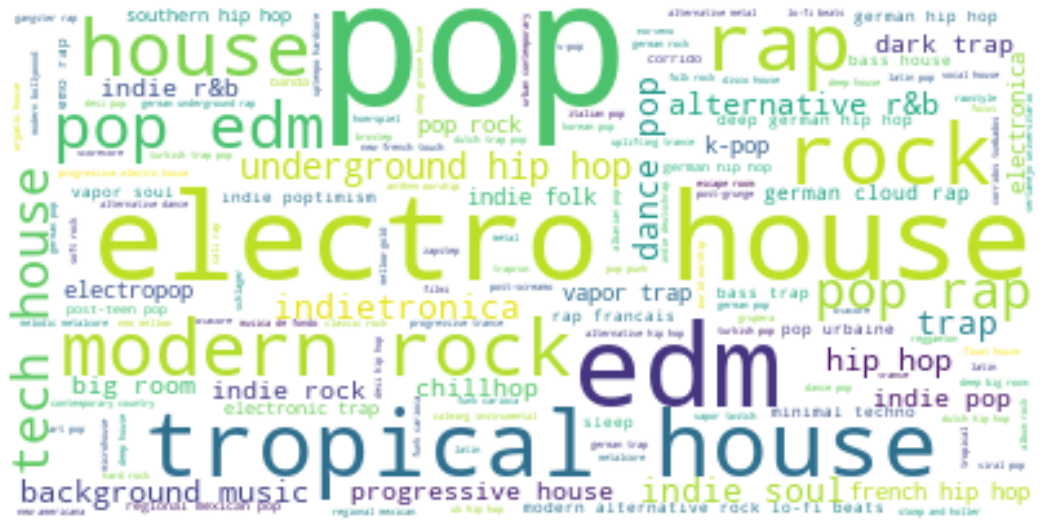

In [35]:
# creating a dataframe with all genres
genres = df['genres'].str.strip("[]")
genres = genres.str.split("',", expand=True)

# plotting wordcloud using imported file
plotting.wc(genres)

### Main genres

To increase comparability the genre lists are reclassified into main genres:

In [36]:
main_genres={'hip hop': 'hiphop',
             'hiphop' : 'hiphop',
             'soul':'soul',
             'jazz':'jazz',
             'funk' : 'funk',
             'metal':'metal',
             'disco':'disco',
             'latin' : 'latin',
             'r&b':'r&b',
             'blues':'blues',
             'classical' : 'classical',
             'adult standards':'adult standards',
             'musical' : 'musical',
             'soundtrack':'soundtrack',
             'comic':'comic',
             'electro' : 'electronic',
             'rap' :'rap',
             'swing':'swing',
             'country':'country',  
             'punk' : 'punk',             
             'pop':'pop',
             'rock':'rock',
             'reggae':'reggae',
             'gospel':'gospel',
             'regional mexican':'regional mexican',
             'chanson':'chanson',
             'sleep':'sleep',
             'movie':'movie tunes',
             'children':'children\'s music',
             'show': 'show tunes',
             'background':'background music',
             'schlager':'schlager',
             'house':'house',

             'mariachi':'regional mexican',
             'tejano':'regional mexican',
             'corrido':'regional mexican',
             'grupera':'regional mexican',
             'ranchera':'regional mexican',
             'hollywood':'movie tunes',
             'broadway': 'show tunes',
             'neo mellow':'pop',
             'nashville':'country',
             'lo-fi beats':'hiphop',
             'lullaby':"children's music",
             'motown':'r&b',
             'comedy':'comic',
             'cumbia':'latin',
             'salsa':'latin',
             'bachata':'latin',
             'freestyle':'electronic',
             'edm': 'electronic',
             'reading':'audio book',
             'hoerspiel':'audio book',
             'book':'audio book',
             'lesen':'audio book',
             'binaural' : 'sleep',
             

             'christian':'christian music',
             'celtic': 'celtic',
             'surf':'surf',
             'hawaiian':'hawaiian',
             'flamenco':'flamenco',
             'new age':'new age',
             'psych':'pychodelic',
             
             "[]":'unspecified'
            }

In [37]:
# assiging main genres according to dict
df['main_genres']= df['genres'].fillna("[]", inplace=False)
for m in main_genres.items():
    df['main_genres']=df['main_genres'].apply(lambda x: m[1] if m[0] in x else x)

# finding the top 20 main genres
genres=df['main_genres'].value_counts().head(20).keys()
genres=list(genres)

# assining all other tracks to other
df['main_genres']=df['main_genres'].apply(lambda x: x if  x in genres else 'other')
df['main_genres']=df['main_genres'].str.strip("'[]'")
df['main_genres'].value_counts()

unspecified         266974
other                28850
pop                  15154
hiphop               11742
rap                   7170
electronic            4551
rock                  3575
metal                 3456
house                 2694
jazz                  2138
punk                  2029
latin                 1851
classical             1718
soul                  1686
funk                  1418
r&b                   1281
regional mexican       963
disco                  921
country                900
audio book             747
sleep                  613
Name: main_genres, dtype: int64

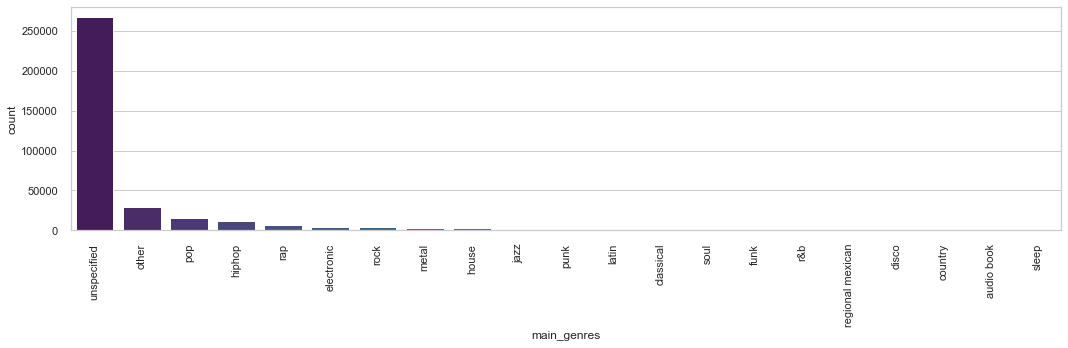

In [38]:
# plotting
plt.figure(figsize=(15,5))
chart = sns.countplot(x='main_genres',data=df,order=pd.value_counts(df['main_genres']).index, palette='viridis');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
plt.tight_layout()
plt.savefig('figures/main_genre_2019_count.png')

### Number of genres

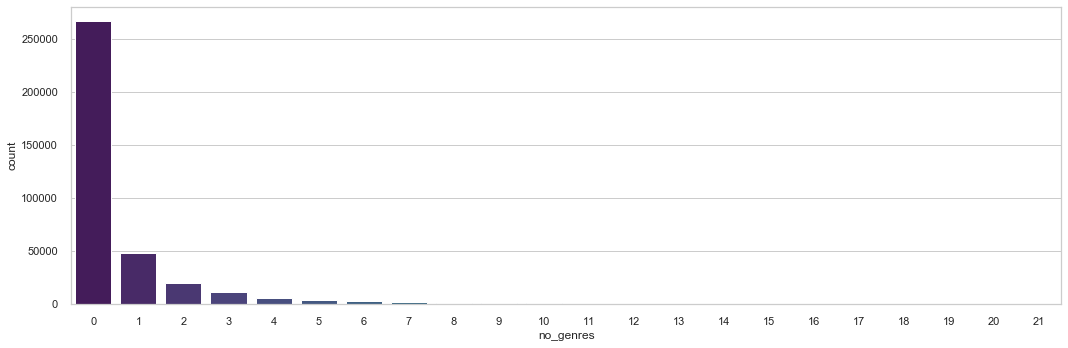

In [40]:
# reformating from sting to list

df.dropna(subset=['genres'], inplace=True)
df.loc[:,'genres'] = df.loc[:,'genres'].apply(lambda x: literal_eval(x))

# counting artists in list
df['no_genres'] = df['genres'].str.len()

# plotting
plt.figure(figsize=(15,5))
chart = sns.countplot(x='no_genres',data=df, palette='viridis');
chart.set_xticklabels(chart.get_xticklabels(), rotation=0);
plt.tight_layout()
plt.savefig('figures/no_genre_2019_count.png')

## Duration , loudness, tempo

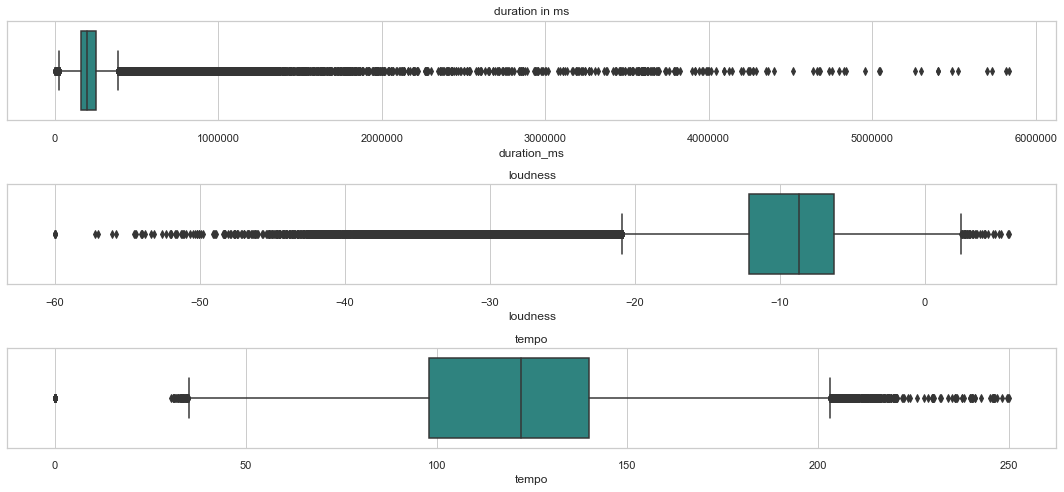

In [41]:
# plotting distribution via boxplots
f, axes = plt.subplots(3, 1, figsize=(15, 7), sharex=False)
sns.boxplot(df['duration_ms'], palette='viridis',ax=axes[0]).set_title('duration in ms');
sns.boxplot(df['loudness'], palette='viridis',ax=axes[1]).set_title('loudness');
sns.boxplot(df['tempo'], palette='viridis',ax=axes[2]).set_title('tempo');
f.tight_layout()
plt.savefig('figures/duration_loudness_tempo_2019_box.png')

## Explicity

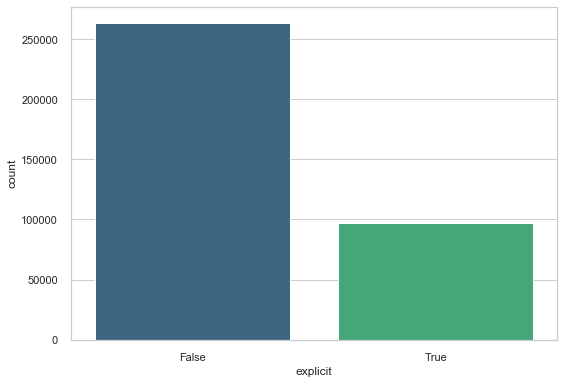

In [42]:
sns.countplot(df['explicit'], palette='viridis');
plt.tight_layout()
plt.savefig('figures/explicit_2019_count.png')

In [43]:
# Converting the type from bool to 0 and 1 for further processing.
df['explicit']=df['explicit']*1

# Outliers

In [44]:
# finding outliers for features that showed high variance
lof = LocalOutlierFactor()
yhat = lof.fit_predict(df[['total_album_tracks', 'album_track_no', 
                           'duration_ms', 'loudness', 'tempo']])
mask = yhat != -1

# outliers as per cent of the data
((df.shape[0]-df.loc[mask].shape[0])/df.shape[0])*100

3.4863815820503783

In [45]:
# removing outliers from the dataset
df = df.loc[mask]

# Correlations

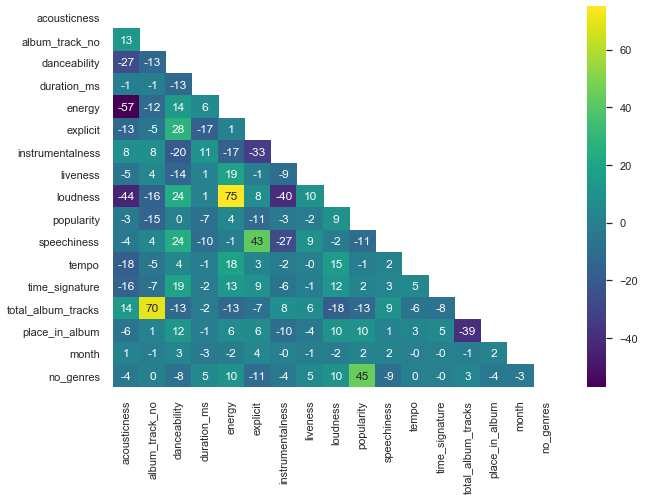

In [46]:
# plotting correlations between the features to spot possible multicolliniarity problems
# and between the features and the lable to estimate 
mask = np.triu(df.corr())
plt.figure(figsize = (10,7))
ax = sns.heatmap(round(df.corr()*100)
                 ,annot=True
                 ,mask=mask
                 ,cmap='viridis')

plt.savefig('figures/correlogram_2019.png')

In [47]:
# saving cleaned data to csv
df.to_csv("data/tracks_2019_cleaned.csv", sep = ',')